In [1]:
import requests
from datetime import datetime as time
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

class DataBase:
    
    def __init__(self):
        # to be used if we need to create our own dataframe .csv file!
        self.file_path = ''
        # The clean DataSet that will be used by all users iteration!
        self.clean_DataSet = None
        # When we have to store Data Frames made by collecting info from
        # the following websites APIs.
        self.TMDb = None
        self.IMDb = None
        self.BOMDb = None
        
        # The BoxOffice Dataset from the 90's until April 2020, 
        # WITH release date!
        self.__bo_90_20 = 'dataset_mojo_budget_update_from_1990_until_04_20.csv'
        # The BoxOffice Dataset from all years until 2019,
        # WITHOUT release date!
        self.__bo_all_19 = 'datasets_boxoffice_alltime_until_august_2019.csv'

    

    def BO_DS_cleaning(self):
        
        bo_df = pd.read_csv(self.__bo_90_20)
        bo_df.drop(labels = [
            'trivia','mpaa','run_time','distributor','director',
            'composer','cinematographer','writer','main_actor_1',
            'main_actor_2','main_actor_3','main_actor_4','producer','html'
            ], axis='columns', inplace=True)
        # print('\n')
        # print('raw dataframe')
        # print(bo_df.head(5))
        # print('\n')
        # print('clean dataframe')
        
        bo_df['date'] = bo_df['year'].astype(str) + ' ' + bo_df['release_date']
        cols = bo_df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        bo_df = bo_df[cols]
        bo_df['budget'] = bo_df['budget']/1000000
        bo_df['date'] = pd.to_datetime(bo_df['date'])
        bo_df.drop(labels = ['year','release_date'], axis='columns', inplace=True)
        # print(bo_df.head(5))
        # print('\n')
        #print(bo_df.tail(5))
        self.clean_DataSet = bo_df
        return self.clean_DataSet

    # # def __DataSet_generator(self):
    # #     if Public TMDb, IMDb and BOMDb exists:
    # #         if Day Date == Today:
    # #             Pandas
    # #             Data Set
    # #     else:
    # #         Call __private_method_TMDb_cleaning.requests()
    # #         Pandas
    # #         DataSet
    # #     pass

    # #private = property(__BOMDb_cleaning)



In [230]:
class Date(DataBase):
    
    
    def __Pandas_filter(self,date = None):
        
        DataBase.BO_DS_cleaning(self)
        df = self.clean_DataSet 
        # print(df)
        # Die Hard 2 release date in U.S.
        default_date = '1990-07-06'
        # this format was the only one that manage to work, link beneath
        date = default_date if date is None else date
        # https://stackoverflow.com/questions/52494128/call-function-without-optional-arguments-if-they-are-none
        try:
            self.date = pd.to_datetime(date)
            # print(df.query("date == @self.date"))
            self.df_filter = df.query("date == @self.date")
            return self.df_filter
        except ValueError:
            print('\nPlease insert a valide date format!\n')

    def __date_input(self,date=None):
        
        
        DataBase.BO_DS_cleaning(self)
        df = self.clean_DataSet 
        while True:
            try:
                date = input("\nWhat date do you want to analize?\nExample: 21 November 2019, or 2019-11-21\n\tType one style here->")
                
                if date == '':
                    date = None
                    self.input_date = date
                    # print('\n DONE None \n')
                    # Exit the loop if success!
                    break
                else: 
                    self.input_date = pd.to_datetime(date)
                    does_it_exist = df.isin([self.input_date]).any().any()
                    # print('\nit cames this far\n')
                    if does_it_exist:
                        self.input_date = pd.to_datetime(date)
                        # print('\n DONE to Date Time \n')
                        # Exit the loop if success!
                        break
                    else:
                        print("\nMaybe this isn't in our database, try some another date in between the 90's and 2020-04-01!\n")
                    # Exit the loop if success!
                    
            except ValueError: 
                print("\nSorry, I didn't understand that.\nExemples of valid formats are:\n21 November 2019 or 2019-11-21\n")
                # let's try again without breaking the code...
                continue
        
        # self.input_date = pd.to_datetime(date)
        self.__Pandas_filter(self.input_date)
        
    def graphic_view(self):
        """
        This is the only public method of the child Class Date()! It
        calls for 'self.__date_input()', which will asks for the users
        input in date format. 
        It'll take the returned values from the methods above and their
        public self.objects and use it to generate a graphic view of the
        results of 'self.__Pandas_filter()' !!!
        """
        self.__date_input()
        
        df_plot_full = self.clean_DataSet
        df_cut = self.df_filter
        #df_cut = self.df_filter.iloc[0,0].strftime("%Y-%m")
        #df_plot_full = self.clean_DataSet.iloc[0,0].strftime("%Y-%m")
        
        print('\n')
        print('It came this far! Graphic_View!')
        print(df_cut)
        print('\n')
        df_cut.plot(kind='bar', x='genre_1', y='budget')
        plt.show()
        
        #print('\n ########## \n')
        #print(df_plot_full.loc[df_plot_full['date'] == df_cut['date']])
        #print('\n ########## \n')
        
        self.clean_DataSet.iloc[0,0].strftime("%Y-%m")
        def extract_month(x):
            x = x.strftime("%Y-%m-%d")
            clean_x = x[0:7]
            return clean_x
        
        df_plot_full = df_plot_full.dropna(subset=['date', 'genre_1'])
        df_cut_new = df_cut['date'].apply(extract_month)
        s = pd.Series(df_plot_full['date'].apply(extract_month))
        # df_plot_full["date"] = df_plot_full["date"].apply(extract_month)
        # df_plot_full.loc[:]["date"] = df_plot_full["date"].apply(extract_month)
        # df_plot_full.assign(date = df_plot_full["date"].apply(extract_month))
        #df_plot_full['date'] = df_plot_full['date'].apply(extract_month)
        print('\n PRINTING S \n')
        print(s)
        print('@@@@@@@@@@@')
        df_plot_full.insert(0, "VONN", s)
        #df_plot_full['date'] = s
        print("\n%%$$%%$%$%%¨&$%¨&$%¨&$%¨&$%¨&\n")
        print(df_plot_full.head(5))
        print("\n%%$$%%$%$%%¨&$%¨&$%¨&$%¨&$%¨&\n")
        #test = extract_month('1990-05-05')
        #print(test)
        print('\n Came until SLISCING!')
        print('\nThis is from the user search')
        #print(df_cut_new)
        print('\nThis is from all data frame')
        print(df_plot_full['date'].head(5))
        print('\n')
       
        print('it keeps inplace')
        #print(df_cut['date'] == df_cut['date'].apply(extract_month))
        print('\n')
        #print(df_plot_full['date']==df_plot_full['date'].apply(extract_month))
        print('sucess?')
        print(df_cut.head(5))
        #new_date_format = df_cut['date'].apply(extract_month)
        #df_cut.loc[:,'date'] = new_date_format



In [231]:
a = Date()


What date do you want to analize?
Example: 21 November 2019, or 2019-11-21
	Type one style here->


It came this far! Graphic_View!
        date   movie_id       title  budget     domestic  international  \
4 1990-07-06  tt0099423  Die Hard 2    70.0  117540947.0    122706486.0   

     worldwide genre_1   genre_2 genre_3 genre_4  
4  240247433.0  Action  Thriller     NaN     NaN  




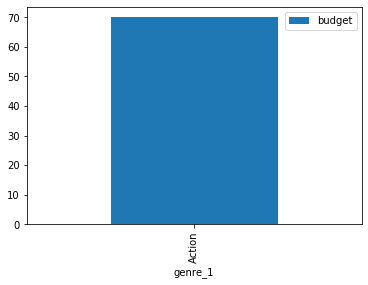


 PRINTING S 

0       1990-05
1       1990-12
2       1990-11
3       1990-06
4       1990-07
         ...   
3238    2019-07
3239    2019-11
3240    2019-03
3241    2019-11
3242    2020-02
Name: date, Length: 3242, dtype: object
@@@@@@@@@@@

%%$$%%$%$%%¨&$%¨&$%¨&$%¨&$%¨&

      VONN       date   movie_id                        title  budget  \
0  1990-05 1990-05-25  tt0099088  Back to the Future Part III    40.0   
1  1990-12 1990-12-22  tt0099165  The Bonfire of the Vanities    47.0   
2  1990-11 1990-11-09  tt0099348           Dances with Wolves    22.0   
3  1990-06 1990-06-15  tt0099422                   Dick Tracy    47.0   
4  1990-07 1990-07-06  tt0099423                   Die Hard 2    70.0   

      domestic  international    worldwide    genre_1   genre_2  genre_3  \
0   88277583.0    157866667.0  246144250.0  Adventure    Comedy   Sci-Fi   
1   15691192.0            NaN   15691192.0     Comedy     Drama  Romance   
2  184208848.0    240000000.0  424208848.0  Adventure     

In [232]:
a.graphic_view()

In [3]:
class Name(DataBase):
    
    
    def __Pandas_filter(self,name = None):
        
        DataBase.BO_DS_cleaning(self)
        df = self.clean_DataSet 
        # print(df)
        # Get Out as default name if nothing is typed!
        default_name = 'Get Out'
        name = default_name if name is None else name
        try:
            self.name = name
            print('\n')
            #print(df.query("title == @self.name"))
            self.df_name_filter = df.query("title == @self.name")
            return self.df_name_filter
        except ValueError:
            print('\nPlease insert a valide name!\n')
        
        
    def name_input(self,name=None):
        
        DataBase.BO_DS_cleaning(self)
        df = self.clean_DataSet 
        while True:
            try:
                name = input("\nWhat movie name do you want to analize?\nExample: Die Hard 2, or Get Out\n\tType one name here->")
                does_it_exist = df.isin([name]).any().any()
                if does_it_exist:
                    self.input_name = name
                    # Exit the loop if success!
                    break
                elif name == '':
                    name = None
                    self.input_name = name
                    # Exit the loop if success!
                    break
                else:
                    print("\nMaybe this isn't in our database, try one movie released between the 90's and April 2020!\n")
            except ValueError: 
                print("\nSorry, I didn't understand that.\nCan you try again?")
                # let's try again without breaking the code...
                continue
        
        
        # self.input_name = pd.to_datetime(name)
        self.__Pandas_filter(self.input_name)

        df_name = self.df_name_filter
        # print(df_name[['title', 'date', 'budget']])
        # check if duplicate
        if len(df_name.index) > 1:
            print('\n')
            print(self.df_name_filter)
            print('\nIt should have duplicateds!\n')
            # print(df_name)
            print("\nPlease, choose one of the dates and insert next!\n")
            better_method = Date()
            better_method.graphic_view()
        else:
            print('\n')
            print(df_name[['title', 'date', 'budget','genre_1']])
            print('\n')
            print('Type the date of this movie next!')
            better_method = Date()
            better_method.graphic_view()

In [6]:
def extract_month(month):
    clean_month = month[0:7]
    return clean_month

extract_month('1990-05-05')

'1990-05'